In [1]:
import pandas as pd

df = pd.read_csv('/content/Vehicle_fbk.csv')
display(df.head())

,elapsed time,timestamp,topic,value
0,0.310063,1.760117e+09,/vehicle_fbk.throttle_position,6.272
1,0.327102,1.760117e+09,/vehicle_fbk.throttle_position,5.488
2,0.342822,1.760117e+09,/vehicle_fbk.throttle_position,5.488
3,0.349800,1.760117e+09,/vehicle_fbk.throttle_position,5.880
4,0.359484,1.760117e+09,/vehicle_fbk.throttle_position,5.880


In [2]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262341 entries, 0 to 262340
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   elapsed time  262341 non-null  float64
 1   timestamp     262341 non-null  float64
 2   topic         262341 non-null  object 
 3   value         262341 non-null  float64
dtypes: float64(3), object(1)
memory usage: 8.0+ MB


None

In [3]:
display(df['topic'].value_counts())

,count
topic,
/vehicle_fbk.throttle_position,29149
/vehicle_fbk.steering_wheel_angle,29149
/vehicle_fbk.yaw_rate,29149
/vehicle_fbk.voltage,29149
/vehicle_fbk.v_fl,29149
/vehicle_fbk.v_fr,29149
/vehicle_fbk.v_rl,29149
/vehicle_fbk.v_rr,29149
/vehicle_fbk.brake_pedal_position,29149


In [5]:
display(df['topic'].unique())

array(['/vehicle_fbk.throttle_position',
       '/vehicle_fbk.steering_wheel_angle', '/vehicle_fbk.yaw_rate',
       '/vehicle_fbk.voltage', '/vehicle_fbk.v_fl', '/vehicle_fbk.v_fr',
       '/vehicle_fbk.v_rl', '/vehicle_fbk.v_rr',
       '/vehicle_fbk.brake_pedal_position'], dtype=object)

In [7]:
topic_dfs = {}
for topic in df['topic'].unique():
    topic_dfs[topic] = df[df['topic'] == topic][['value']].reset_index(drop=True)

display("DataFrames creados para cada topic:", topic_dfs.keys())
display("Ejemplo: DataFrame para el topic '/vehicle_fbk.throttle_position'", topic_dfs['/vehicle_fbk.throttle_position'].head())

'DataFrames creados para cada topic:'

dict_keys(['/vehicle_fbk.throttle_position', '/vehicle_fbk.steering_wheel_angle', '/vehicle_fbk.yaw_rate', '/vehicle_fbk.voltage', '/vehicle_fbk.v_fl', '/vehicle_fbk.v_fr', '/vehicle_fbk.v_rl', '/vehicle_fbk.v_rr', '/vehicle_fbk.brake_pedal_position'])

"Ejemplo: DataFrame para el topic '/vehicle_fbk.throttle_position'"

,value
0,6.272
1,5.488
2,5.488
3,5.880
4,5.880


In [8]:
for topic_name, df_topic in topic_dfs.items():
    print(f"\nEstadísticas descriptivas para el topic: {topic_name}")
    display(df_topic.describe())


Estadísticas descriptivas para el topic: /vehicle_fbk.throttle_position


,value
count,29149.000000
mean,7.409498
std,4.080799
min,3.920000
25%,5.096000
50%,5.488000
75%,7.840000
max,35.279999



Estadísticas descriptivas para el topic: /vehicle_fbk.steering_wheel_angle


,value
count,29149.000000
mean,19.572815
std,57.157733
min,-59.700001
25%,-3.800000
50%,4.400000
75%,13.300000
max,353.100006



Estadísticas descriptivas para el topic: /vehicle_fbk.yaw_rate


,value
count,29149.000000
mean,1.572091
std,4.203637
min,-5.760000
25%,0.000000
50%,0.480000
75%,1.280000
max,29.520000



Estadísticas descriptivas para el topic: /vehicle_fbk.voltage


,value
count,29149.000000
mean,13.919560
std,0.038127
min,13.775000
25%,13.900000
50%,13.925000
75%,13.950000
max,14.025000



Estadísticas descriptivas para el topic: /vehicle_fbk.v_fl


,value
count,29149.000000
mean,10.938017
std,4.914090
min,2.312500
25%,7.187500
50%,9.937500
75%,14.750000
max,21.812500



Estadísticas descriptivas para el topic: /vehicle_fbk.v_fr


,value
count,29149.000000
mean,11.087932
std,4.896533
min,2.312500
25%,7.250000
50%,10.437500
75%,14.875000
max,21.875000



Estadísticas descriptivas para el topic: /vehicle_fbk.v_rl


,value
count,29149.000000
mean,10.863486
std,4.910834
min,2.250000
25%,7.062500
50%,9.750000
75%,14.687500
max,21.750000



Estadísticas descriptivas para el topic: /vehicle_fbk.v_rr


,value
count,29149.000000
mean,10.998411
std,4.871932
min,2.250000
25%,7.250000
50%,10.250000
75%,14.750000
max,21.750000



Estadísticas descriptivas para el topic: /vehicle_fbk.brake_pedal_position


,value
count,29149.000000
mean,6.012090
std,7.061897
min,0.000000
25%,0.000000
50%,1.600000
75%,12.000000
max,28.000000


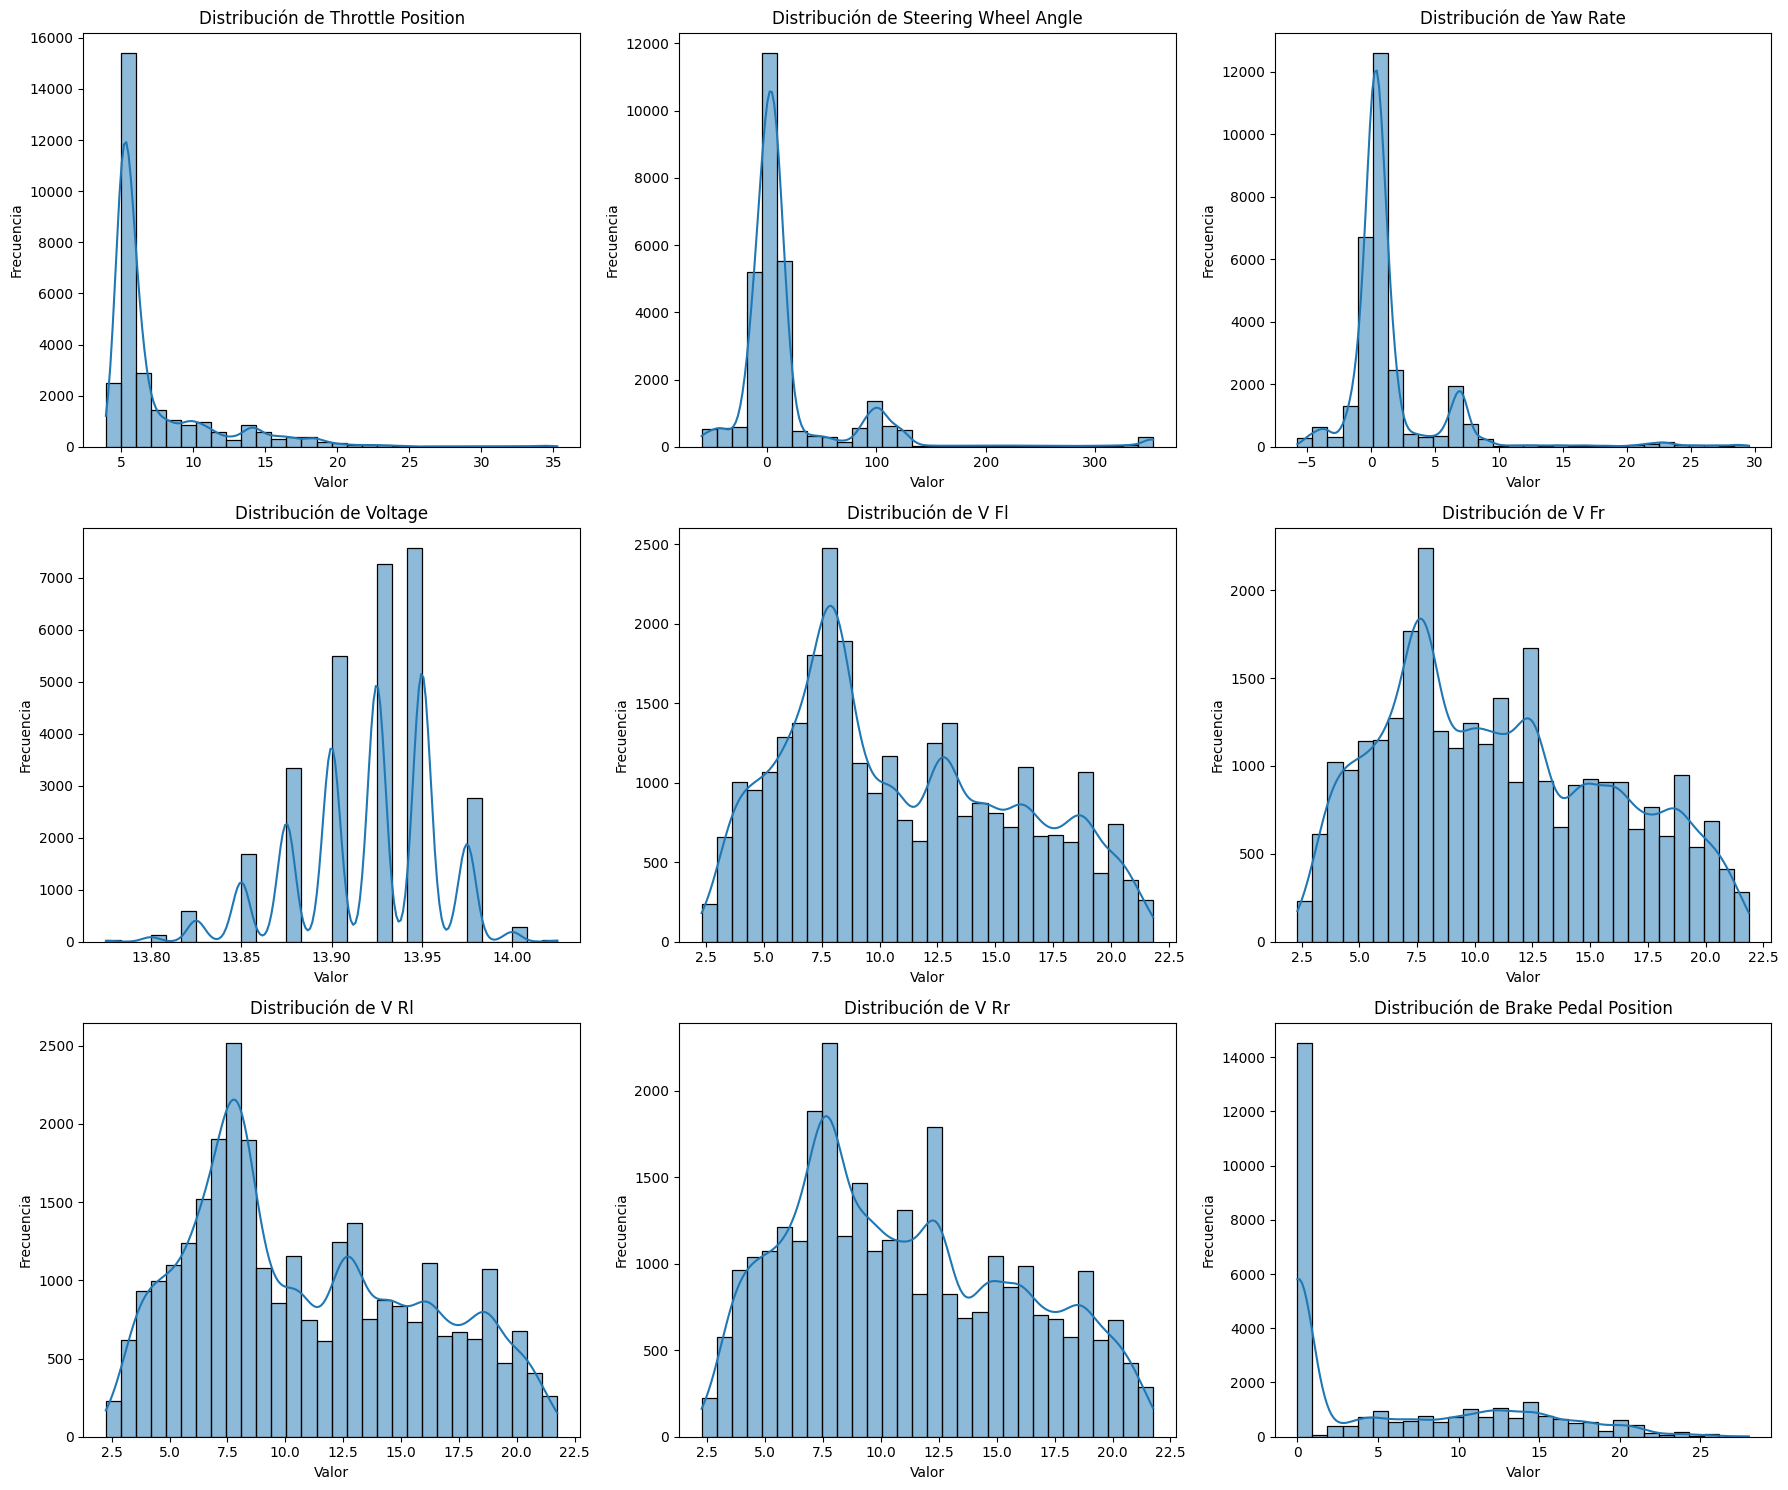

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

num_topics = len(topic_dfs)
n_cols = 3 # Number of columns for the subplot grid
n_rows = (num_topics + n_cols - 1) // n_cols # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, (topic_name, df_topic) in enumerate(topic_dfs.items()):
    sns.histplot(df_topic['value'], kde=True, ax=axes[i], bins=30) # Using KDE for density estimation
    axes[i].set_title(f"Distribución de {topic_name.split('.')[-1].replace('_', ' ').title()}")
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frecuencia")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Primero, vamos a recrear los DataFrames para cada topic, incluyendo la columna `elapsed time` para poder graficar la evolución de los valores a lo largo del tiempo.

In [10]:
topic_dfs = {}
for topic in df['topic'].unique():
    topic_dfs[topic] = df[df['topic'] == topic][['elapsed time', 'value']].reset_index(drop=True)

display("DataFrames creados para cada topic (con 'elapsed time'):", topic_dfs.keys())
display("Ejemplo: DataFrame para el topic '/vehicle_fbk.throttle_position'", topic_dfs['/vehicle_fbk.throttle_position'].head())

"DataFrames creados para cada topic (con 'elapsed time'):"

dict_keys(['/vehicle_fbk.throttle_position', '/vehicle_fbk.steering_wheel_angle', '/vehicle_fbk.yaw_rate', '/vehicle_fbk.voltage', '/vehicle_fbk.v_fl', '/vehicle_fbk.v_fr', '/vehicle_fbk.v_rl', '/vehicle_fbk.v_rr', '/vehicle_fbk.brake_pedal_position'])

"Ejemplo: DataFrame para el topic '/vehicle_fbk.throttle_position'"

,elapsed time,value
0,0.310063,6.272
1,0.327102,5.488
2,0.342822,5.488
3,0.349800,5.880
4,0.359484,5.880


Ahora, grafiquemos los valores de cada topic en función del tiempo usando gráficos de línea.

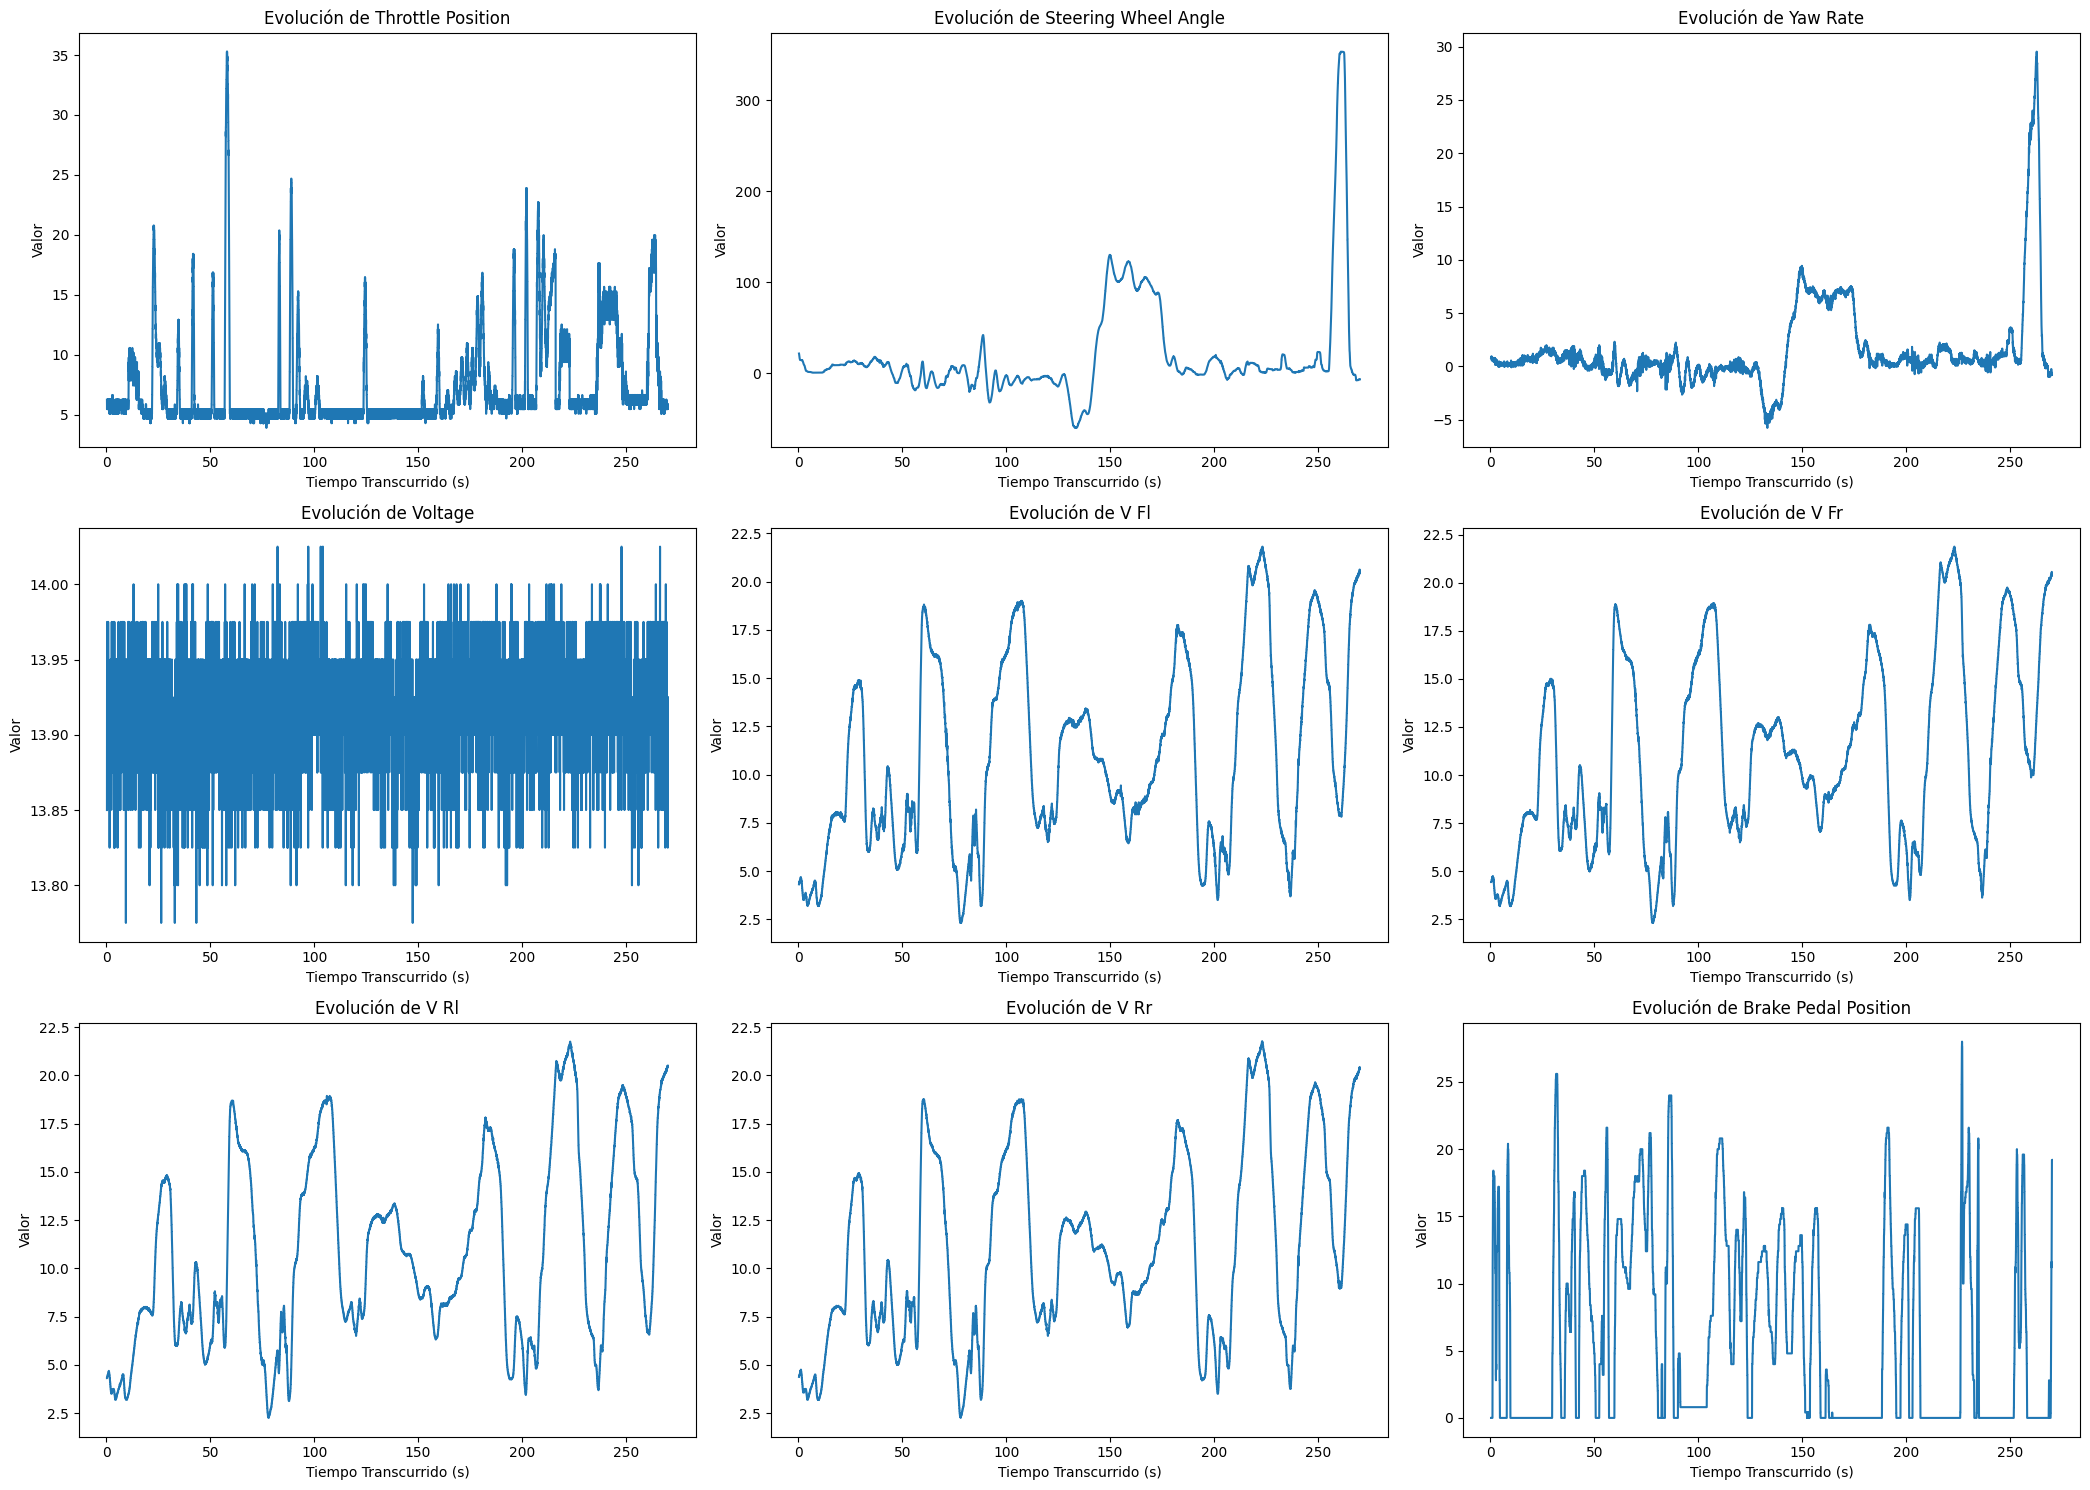

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

num_topics = len(topic_dfs)
n_cols = 3 # Número de columnas para la cuadrícula de subgráficos
n_rows = (num_topics + n_cols - 1) // n_cols # Calcular el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 5))
axes = axes.flatten() # Aplanar el array de ejes para una fácil iteración

for i, (topic_name, df_topic) in enumerate(topic_dfs.items()):
    sns.lineplot(x='elapsed time', y='value', data=df_topic, ax=axes[i])
    axes[i].set_title(f"Evolución de {topic_name.split('.')[-1].replace('_', ' ').title()}")
    axes[i].set_xlabel("Tiempo Transcurrido (s)")
    axes[i].set_ylabel("Valor")

# Ocultar cualquier subgráfico no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()